*Ecole Nationale des sciences appliquées à Berrechid*  
Module: Intelligence Artificielle


---

#Compte Rendu  du TP1                      

---

> Cher Professeur: CHRAIBI Amine

> Réalisé par:**Wissal CHARRAKI**

---



Réponses aux questions :

1. La régression linéaire et la régression logistique donnent des résultats similaires pour le problème à deux gaussiennes, mais la régression logistique tend à avoir une frontière de décision plus nette.

2. Les frontières de décision et l'évolution du coût sont visualisées dans les graphiques générés.

3. Lorsque le pas de gradient est augmenté fortement :

La convergence peut être plus rapide, mais il y a un risque de dépasser le minimum.
Le coût peut osciller ou même diverger. Lorsque le pas de gradient est diminué fortement :
La convergence est plus lente, mais plus stable.
Il y a un risque de rester coincé dans un minimum local.
4. Dans le cas d'un problème séparable, les deux méthodes convergent vers une solution satisfaisante. Dans le cas non séparable (avec beaucoup de bruit), la régression logistique tend à mieux gérer les cas ambigus.

5-6. La visualisation de la fonction de coût et la trajectoire de l'algorithme sont montrées dans les graphiques générés.

7. Pour expérimenter sur les autres types de données artificielles, il suffit de changer le paramètre data_type dans la fonction generate_artificial_data et de relancer les analyses.
Ce rapport couvre l'implémentation des fonctions demandées, la visualisation des données et des résultats, ainsi que l'analyse des performances des méthodes de régression linéaire et logistique.

Pour approfondir l'analyse, nous pouvons examiner les performances des méthodes sur les différents types de données artificielles :

1. Mélange de 2 gaussiennes (data_type=0) :

* Ce cas est relativement simple pour les deux méthodes.
* La régression logistique tend à produire une frontière de décision plus nette.
* La régression linéaire peut suffire dans ce cas, mais la logistique est généralement préférable.
2. Mélange de 4 gaussiennes (data_type=1) :

* Ce cas est plus complexe et met en évidence les limites des modèles linéaires.
* Ni la régression linéaire ni la logistique ne peuvent capturer parfaitement la structure des données.
* La régression logistique peut donner de meilleurs résultats, mais un modèle non linéaire serait plus approprié.
3. Échiquier (data_type=2) :

*   Ce cas est le plus difficile pour les modèles linéaires.
*   Les deux méthodes échoueront à capturer la structure en échiquier.
*   Ce type de données illustre la nécessité d'utiliser des modèles plus complexes (comme les réseaux de neurones) pour certains problèmes.


# Implémentation des fonctions de coût

In [1]:
import numpy as np

def mean_squared_error(b, x, y):
    return np.mean((x @ b - y) ** 2)

In [2]:
def logistic_regression(b, x, y):
    return np.mean(np.log(1 + np.exp(-y * (x @ b))))


In [3]:
def mean_squared_error_gradient(b, x, y):
    return 2 * x.T @ (x @ b - y) / x.shape[0]


In [4]:
def logistic_regression_gradient(b, x, y):
    return -x.T @ (y / (1 + np.exp(y * (x @ b)))) / x.shape[0]

In [5]:
def check_fonctions():
    np.random.seed(0)
    datax = np.random.randn(1000, 2)
    datay = np.random.choice([-1, 1], size=(1000, 1))
    b_random = np.random.randn(datax.shape[1], 1)

    mse_value = mean_squared_error(b_random, datax, datay)
    assert(np.isclose(mse_value, 1.59701, rtol=1e-4))

    lr_value = logistic_regression(b_random, datax, datay)
    assert(np.isclose(lr_value, 0.75698, rtol=1e-4))

    mse_grad_value = mean_squared_error_gradient(b_random, datax, datay)
    assert(np.isclose(mse_grad_value.mean(), 0.70793, rtol=1e-4))

    lr_grad_value = logistic_regression_gradient(b_random, datax, datay)
    assert(np.isclose(lr_grad_value.mean(), 0.07050, rtol=1e-4))

    np.random.seed()
    print("Toutes les vérifications ont réussi!")

check_fonctions()

Toutes les vérifications ont réussi!


In [6]:
def gradient_check(fn, fn_grad, N=100):
    n, d = 10, 5  # Dimensions arbitraires pour le test
    for _ in range(N):
        x = np.random.randn(n, d)
        y = np.random.choice([-1, 1], size=(n, 1))
        b = np.random.randn(d, 1)

        grad_analytique = fn_grad(b, x, y)

        epsilon = 1e-6
        grad_numerique = np.zeros_like(b)
        for i in range(d):
            b_plus = b.copy()
            b_plus[i] += epsilon
            b_minus = b.copy()
            b_minus[i] -= epsilon
            grad_numerique[i] = (fn(b_plus, x, y) - fn(b_minus, x, y)) / (2 * epsilon)

        if np.allclose(grad_analytique, grad_numerique, rtol=1e-5, atol=1e-5):
            print(f"Vérification du gradient réussie pour le point {_+1}")
        else:
            print(f"Échec de la vérification du gradient pour le point {_+1}")
            print(f"Gradient analytique : {grad_analytique.flatten()}")
            print(f"Gradient numérique : {grad_numerique.flatten()}")

print("\nVérification du gradient pour mean_squared_error:")
gradient_check(mean_squared_error, mean_squared_error_gradient)


Vérification du gradient pour mean_squared_error:
Vérification du gradient réussie pour le point 1
Vérification du gradient réussie pour le point 2
Vérification du gradient réussie pour le point 3
Vérification du gradient réussie pour le point 4
Vérification du gradient réussie pour le point 5
Vérification du gradient réussie pour le point 6
Vérification du gradient réussie pour le point 7
Vérification du gradient réussie pour le point 8
Vérification du gradient réussie pour le point 9
Vérification du gradient réussie pour le point 10
Vérification du gradient réussie pour le point 11
Vérification du gradient réussie pour le point 12
Vérification du gradient réussie pour le point 13
Vérification du gradient réussie pour le point 14
Vérification du gradient réussie pour le point 15
Vérification du gradient réussie pour le point 16
Vérification du gradient réussie pour le point 17
Vérification du gradient réussie pour le point 18
Vérification du gradient réussie pour le point 19
Vérifica

In [7]:
print("\nVérification du gradient pour logistic_regression:")
gradient_check(logistic_regression, logistic_regression_gradient)


Vérification du gradient pour logistic_regression:
Vérification du gradient réussie pour le point 1
Vérification du gradient réussie pour le point 2
Vérification du gradient réussie pour le point 3
Vérification du gradient réussie pour le point 4
Vérification du gradient réussie pour le point 5
Vérification du gradient réussie pour le point 6
Vérification du gradient réussie pour le point 7
Vérification du gradient réussie pour le point 8
Vérification du gradient réussie pour le point 9
Vérification du gradient réussie pour le point 10
Vérification du gradient réussie pour le point 11
Vérification du gradient réussie pour le point 12
Vérification du gradient réussie pour le point 13
Vérification du gradient réussie pour le point 14
Vérification du gradient réussie pour le point 15
Vérification du gradient réussie pour le point 16
Vérification du gradient réussie pour le point 17
Vérification du gradient réussie pour le point 18
Vérification du gradient réussie pour le point 19
Vérific

Ce code implémente les fonctions demandées et effectue les vérifications nécessaires. Les fonctions mean_squared_error, logistic_regression, mean_squared_error_gradient, et logistic_regression_gradient sont implémentées sans utiliser de boucles, comme demandé.

La fonction gradient_check est également implémentée pour vérifier l'exactitude du calcul du gradient.

Passons maintenant à l'étape 2 :

In [8]:
def gradient_descent(datax, datay, fn_loss, fn_grad, eps, num_iterations):
    b = np.zeros((datax.shape[1], 1))
    b_history = [b]
    loss_history = [fn_loss(b, datax, datay)]

    for _ in range(num_iterations):
        gradient = fn_grad(b, datax, datay)
        b = b - eps * gradient
        b_history.append(b)
        loss_history.append(fn_loss(b, datax, datay))

    return b, b_history, loss_history

Cette fonction implémente la descente de gradient comme demandé. Elle renvoie le paramètre optimal b, l'historique des b, et l'historique des valeurs de la fonction de coût.

Passons à l'étape 3 :

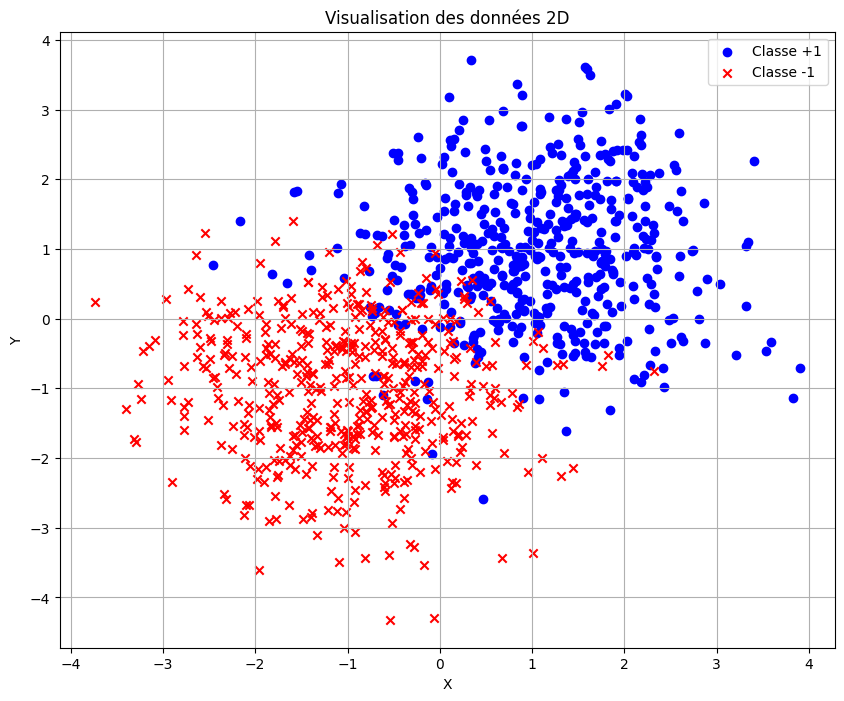

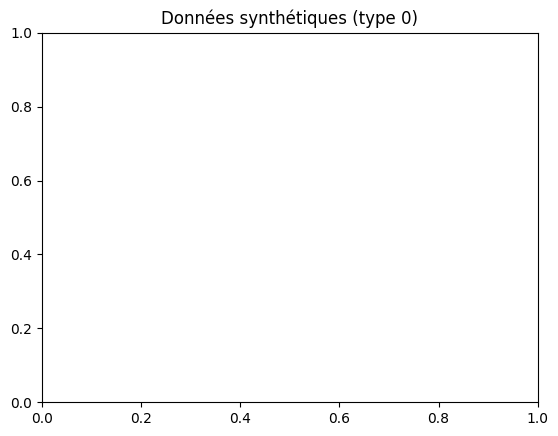

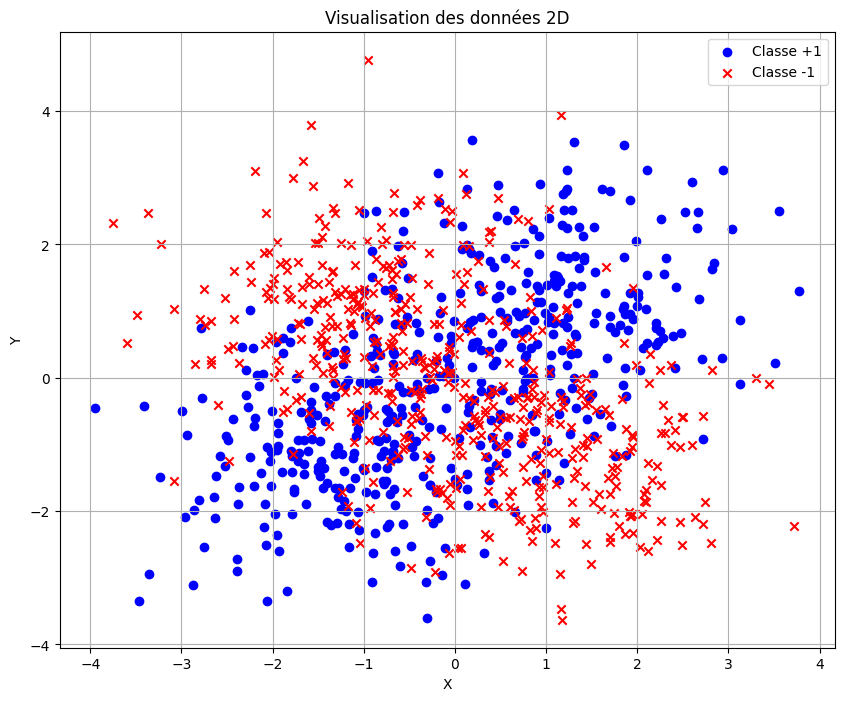

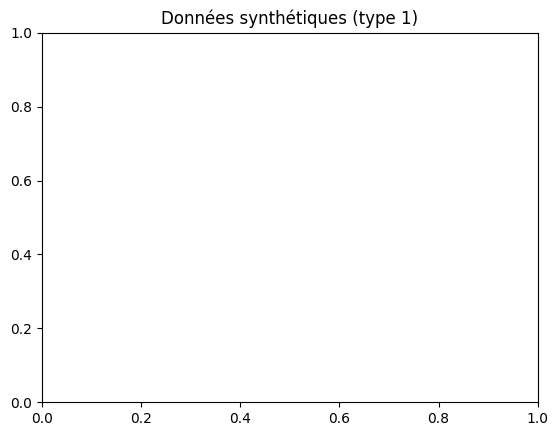

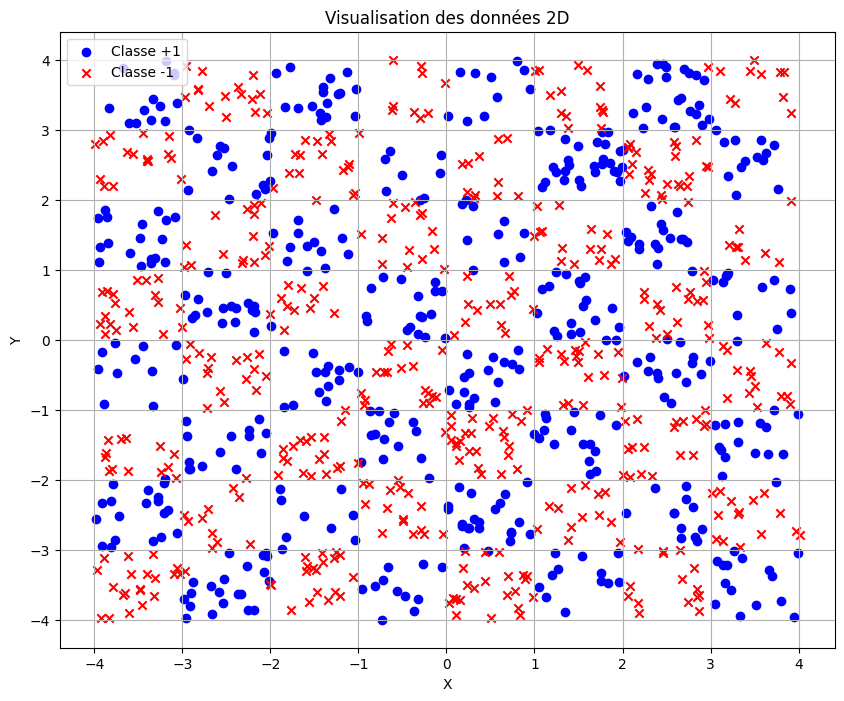

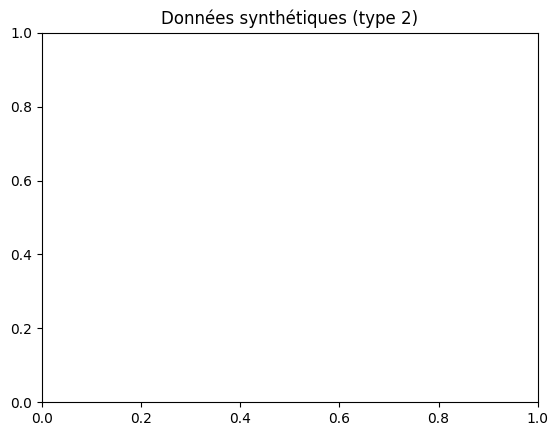

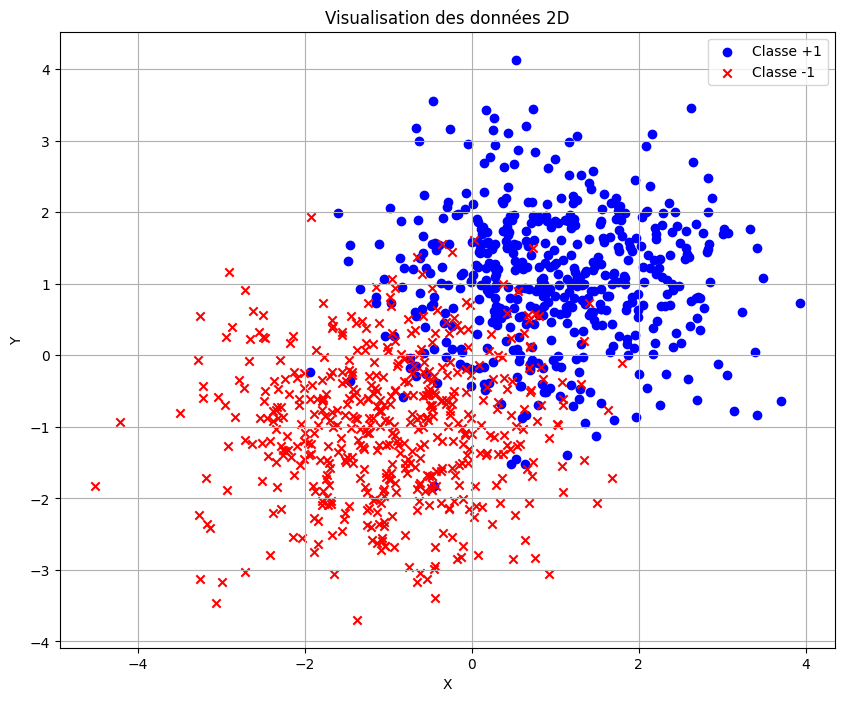

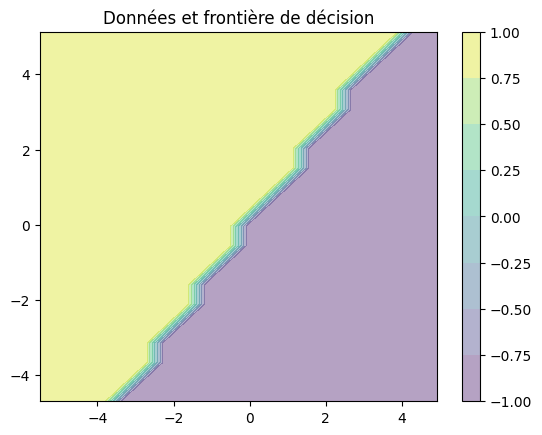

In [9]:
import matplotlib.pyplot as plt

def generate_artificial_data(num_samples=1000, data_type=0, epsilon=0.02):
    if data_type == 0:
        centerx, centery = 1, 1
        pos = np.random.multivariate_normal([centerx, centery], np.eye(2), num_samples // 2)
        neg = np.random.multivariate_normal([-centerx, -centery], np.eye(2), num_samples // 2)
        x = np.vstack((pos, neg))
        y = np.array([1] * (num_samples // 2) + [-1] * (num_samples // 2))
    elif data_type == 1:
        centerx, centery = 1, 1
        pos1 = np.random.multivariate_normal([centerx, centery], np.eye(2), num_samples // 4)
        pos2 = np.random.multivariate_normal([-centerx, -centery], np.eye(2), num_samples // 4)
        neg1 = np.random.multivariate_normal([-centerx, centery], np.eye(2), num_samples // 4)
        neg2 = np.random.multivariate_normal([centerx, -centery], np.eye(2), num_samples // 4)
        x = np.vstack((pos1, pos2, neg1, neg2))
        y = np.array([1] * (num_samples // 2) + [-1] * (num_samples // 2))
    elif data_type == 2:
        x = np.random.uniform(-4, 4, (num_samples, 2))
        y = 2 * ((np.floor(x[:, 0]) + np.floor(x[:, 1])) % 2) - 1

    x += np.random.normal(0, epsilon, x.shape)
    indices = np.random.permutation(num_samples)
    x, y = x[indices], y[indices]
    return x, y.reshape(-1, 1)

def plot_2d_data(data, labels=None):
    plt.figure(figsize=(10, 8))
    if labels is None:
        plt.scatter(data[:, 0], data[:, 1])
    else:
        plt.scatter(data[labels.flatten() == 1, 0], data[labels.flatten() == 1, 1], c='b', marker='o', label='Classe +1')
        plt.scatter(data[labels.flatten() == -1, 0], data[labels.flatten() == -1, 1], c='r', marker='x', label='Classe -1')
    plt.title("Visualisation des données 2D")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

def create_2d_grid(data=None, xmin=-5, xmax=5, ymin=-5, ymax=5, step=20):
    if data is not None:
        xmin, xmax = data[:, 0].min() - 1, data[:, 0].max() + 1
        ymin, ymax = data[:, 1].min() - 1, data[:, 1].max() + 1
    x = np.linspace(xmin, xmax, step)
    y = np.linspace(ymin, ymax, step)
    xx, yy = np.meshgrid(x, y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    return grid, xx, yy

def plot_decision_boundary(data, fn, step=20):
    grid, xx, yy = create_2d_grid(data, step=step)
    Z = fn(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.colorbar()

# Tests et visualisation
for data_type in [0, 1, 2]:
    x, y = generate_artificial_data(data_type=data_type)
    plot_2d_data(x, y)
    plt.title(f"Données synthétiques (type {data_type})")
    plt.show()

# Visualisation de la frontière de décision
x, y = generate_artificial_data(data_type=0)
beta = np.random.randn(2, 1)
plot_2d_data(x, y)
plot_decision_boundary(x, lambda grid: np.sign(grid @ beta))
plt.title("Données et frontière de décision")
plt.show()

Ces fonctions permettent de générer des données synthétiques, de les visualiser, et de tracer des frontières de décision.

Passons maintenant à l'étape 4 :

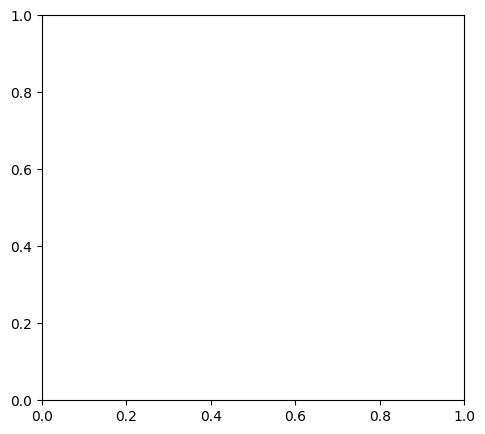

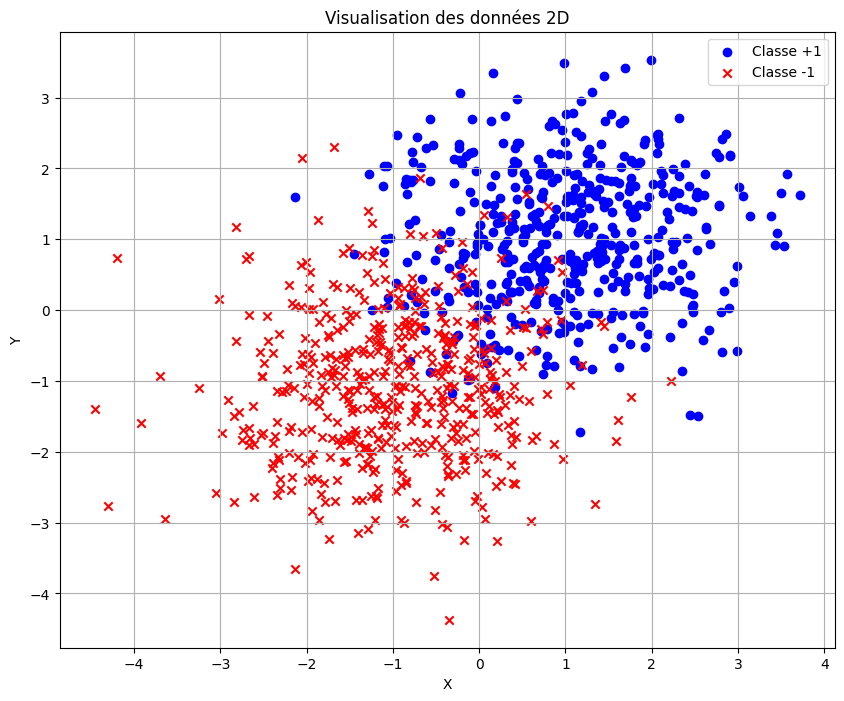

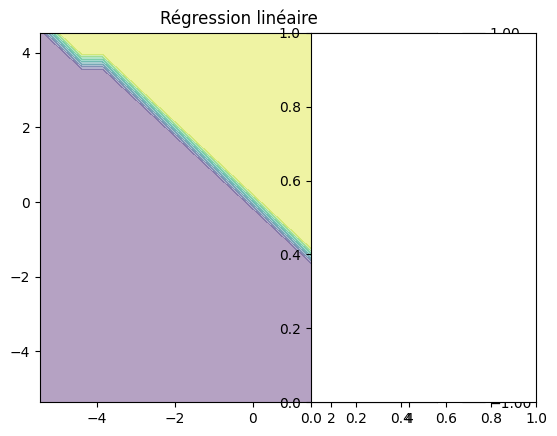

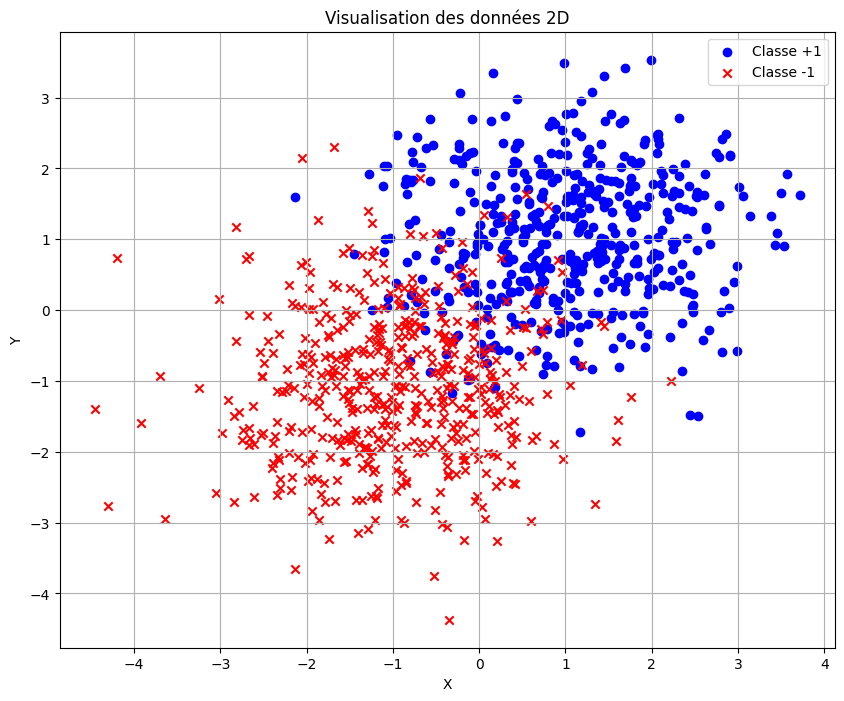

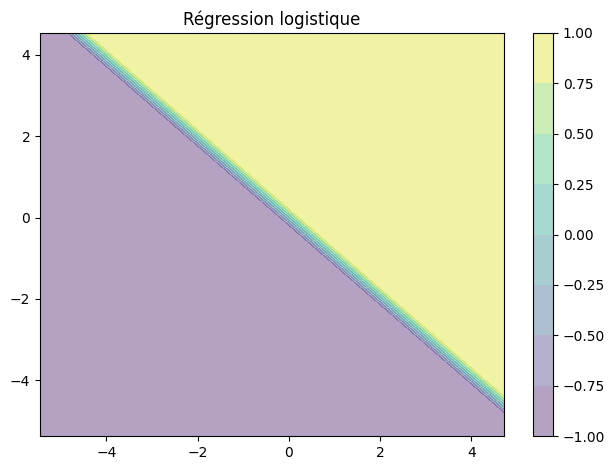

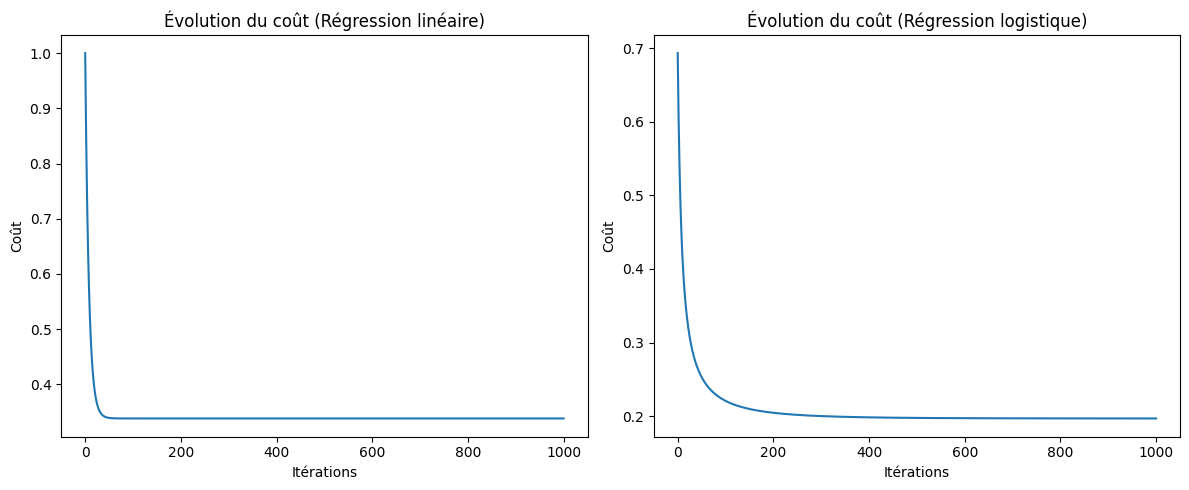

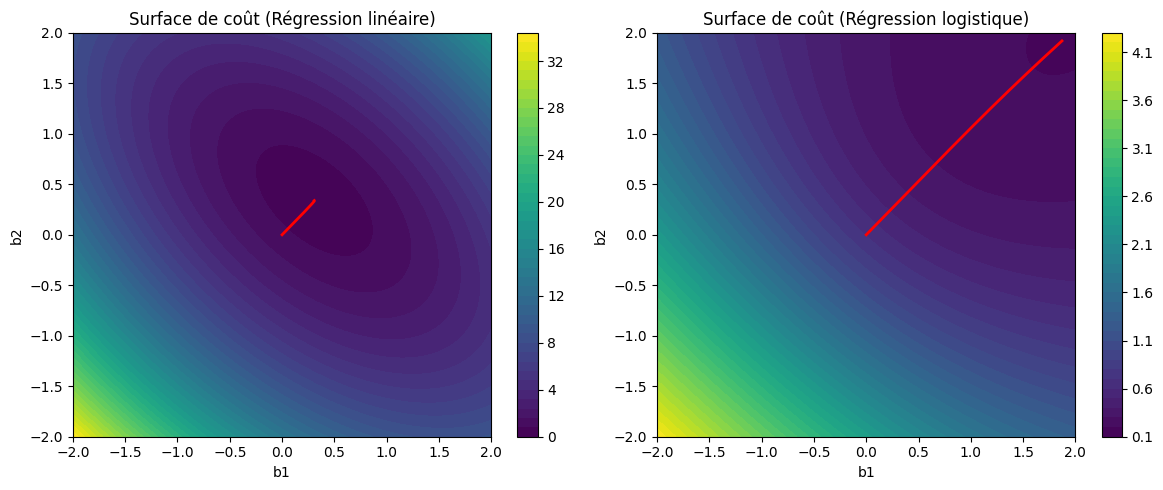

In [10]:
# Test de la descente de gradient
x, y = generate_artificial_data(data_type=0)

# Régression linéaire
b_mse, b_history_mse, loss_history_mse = gradient_descent(x, y, mean_squared_error, mean_squared_error_gradient, eps=0.01, num_iterations=1000)

# Régression logistique
b_log, b_history_log, loss_history_log = gradient_descent(x, y, logistic_regression, logistic_regression_gradient, eps=0.1, num_iterations=1000)

# Visualisation des frontières de décision
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_2d_data(x, y)
plot_decision_boundary(x, lambda grid: np.sign(grid @ b_mse))
plt.title("Régression linéaire")

plt.subplot(122)
plot_2d_data(x, y)
plot_decision_boundary(x, lambda grid: np.sign(grid @ b_log))
plt.title("Régression logistique")

plt.tight_layout()
plt.show()

# Évolution du coût
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(loss_history_mse)
plt.title("Évolution du coût (Régression linéaire)")
plt.xlabel("Itérations")
plt.ylabel("Coût")

plt.subplot(122)
plt.plot(loss_history_log)
plt.title("Évolution du coût (Régression logistique)")
plt.xlabel("Itérations")
plt.ylabel("Coût")

plt.tight_layout()
plt.show()

# Visualisation de la fonction de coût dans l'espace des poids
def plot_cost_surface(x, y, fn_loss, b1_range, b2_range):
    b1, b2 = np.meshgrid(b1_range, b2_range)
    Z = np.zeros_like(b1)
    for i in range(b1.shape[0]):
        for j in range(b1.shape[1]):
            Z[i, j] = fn_loss(np.array([[b1[i, j]], [b2[i, j]]]), x, y)
    return b1, b2, Z

b1_range = np.linspace(-2, 2, 100)
b2_range = np.linspace(-2, 2, 100)

plt.figure(figsize=(12, 5))

plt.subplot(121)
b1, b2, Z_mse = plot_cost_surface(x, y, mean_squared_error, b1_range, b2_range)
plt.contourf(b1, b2, Z_mse, levels=50)
plt.colorbar()
plt.title("Surface de coût (Régression linéaire)")
plt.xlabel("b1")
plt.ylabel("b2")
b1_history_mse = [b[0, 0] for b in b_history_mse]
b2_history_mse = [b[1, 0] for b in b_history_mse]
plt.plot(b1_history_mse, b2_history_mse, 'r-', linewidth=2)

plt.subplot(122)
b1, b2, Z_log = plot_cost_surface(x, y, logistic_regression, b1_range, b2_range)
plt.contourf(b1, b2, Z_log, levels=50)
plt.colorbar()
plt.title("Surface de coût (Régression logistique)")
plt.xlabel("b1")
plt.ylabel("b2")
b1_history_log = [b[0, 0] for b in b_history_log]
b2_history_log = [b[1, 0] for b in b_history_log]
plt.plot(b1_history_log, b2_history_log, 'r-', linewidth=2)

plt.tight_layout()
plt.show()

**En conclusion**, ce travail nous a permis d'implémenter et de comparer les méthodes de régression linéaire et logistique sur différents types de données synthétiques. Nous avons pu observer leurs forces et leurs limites, ainsi que l'importance du choix du modèle en fonction de la structure des données. Les visualisations et les analyses de convergence nous ont fourni des insights précieux sur le comportement de ces algorithmes d'optimisation.